<a href="https://colab.research.google.com/github/Naga-SDonepudi/PyTorch_HandsOn/blob/main/2_Workflow_of_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Checking the GPU and CUDA version first

In [1]:
!nvidia-smi

Sat Jan 24 22:10:22 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## End-to-end workflow of PyTorch
* Getting the data ready and turining to tensors
* Building or picking a pre-trained model
  * Loss Function & Optimizer (if the predictions are poor)
  * Build a Training Loop (if the predictions are poor)
* Fitting the model on data & Making predictions (inference)
* Evaluation
* Experimenting and saving the model

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch import nn  # Contains buidling blcoks related to pytorch for neural networks
torch.__version__

'2.9.0+cu126'

## Getting the data ready
* Creating known data using Linear Regression
* Used Linear Regression formula **y = (wX + b)** to make a straight line with known parameters.

In [3]:
# Known Parameters
weight = 0.8
bias = 0.2

start = 0
end = 2
step = 0.04
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5], len(X), len(y)

(tensor([[0.0000],
         [0.0400],
         [0.0800],
         [0.1200],
         [0.1600]]),
 tensor([[0.2000],
         [0.2320],
         [0.2640],
         [0.2960],
         [0.3280]]),
 50,
 50)

## Splitting data into train and test sets
* Training: Mode learns patterns from this data set (70%-80%)
* Validation: The model will get tuned on validation data set(10%-20%)
* Test: The model will be evaluated on this set(unseen data 10%-20%)

Note: Validation set is not always required, Train and Test are most imp steps.

In [4]:
# Creating train and test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_test, y_test

(tensor([[1.6000],
         [1.6400],
         [1.6800],
         [1.7200],
         [1.7600],
         [1.8000],
         [1.8400],
         [1.8800],
         [1.9200],
         [1.9600]]),
 tensor([[1.4800],
         [1.5120],
         [1.5440],
         [1.5760],
         [1.6080],
         [1.6400],
         [1.6720],
         [1.7040],
         [1.7360],
         [1.7680]]))

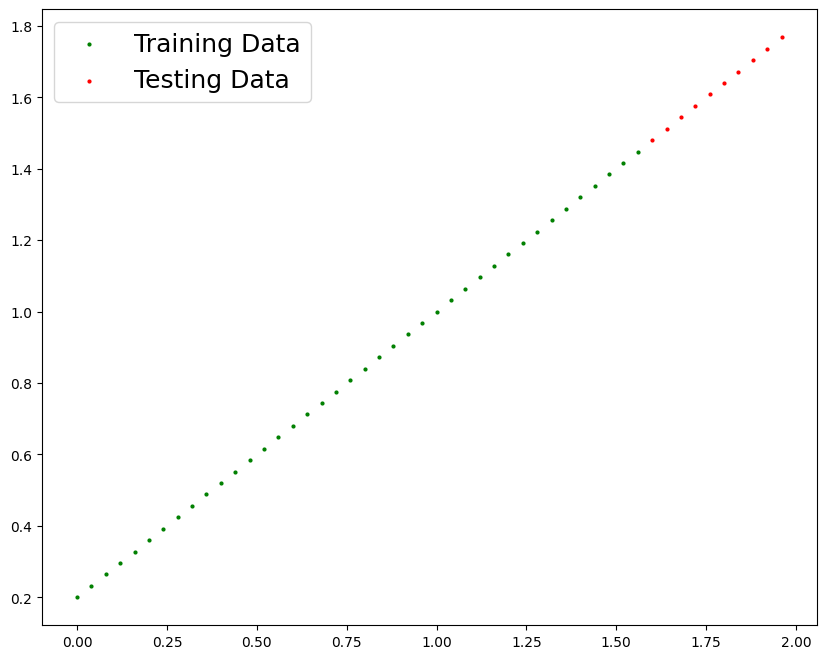

In [6]:
# Visualizing using matplotlib
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  the plot will show train data, test data, and will compare preds
  """
  plt.figure(figsize=(10, 8))

  # Choosing color for train data
  plt.scatter(train_data, train_labels, c="g", s=4, label="Training Data")

  # For testing data
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")

  # For Predictions
  if predictions is not None:
      plt.scatter(test_data, predictions, c="b", s=4, label="Predictions")

  # Legends
  plt.legend(prop={"size": 18});

plot_predictions()

## Buidling the model
* Started with random values like weights and bias
* Adjust the random values to get closer to ideal values, by looking at training data.
* Two main algorithms are Gradient Descent and Backpropogation. (these will be triggered)

In [7]:
# Creating liner regression model class with a nn.module, which is a base class module that PyTorch inherits the most of models, neural networks etc

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initializing Model Params
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define computation in model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

## Buidling Essentials in PyTorch
* torch.nn : a neural network module in PyTorch, which provides buidling blocks to build, train, and evaluate the nn.
* nn.Parameter : Type of tensor tells the PyTorch, that this tensor is a trainable parameter of the model. Here, **weight** and **bias** are the traianable parameters.
* nn.Module : **base class** for all the neural network modules. If this is considered as subclass, then should be overwrited using forward().
* def forward() : A method inside nn.Module that tells how a data flows(forward computation) through model to produce output.
* torch.optim : Contains optimization algorithms like Gradient Descent which optimizes the model parameters by reducing the loss function.
* torchmetrics : for evaluating the model
* torch.utils.tensorboard : Improving the model through experimentation

 ### Inside the Model & Creating an instnace of Model

In [8]:
# random seed
torch.manual_seed(38)

# Creating an instance of model
model_1 = LinearRegressionModel()

# Checking out the params
list(model_1.parameters())

[Parameter containing:
 tensor([1.5060], requires_grad=True),
 Parameter containing:
 tensor([0.1456], requires_grad=True)]

## Making predictions or Inference
* Predictions on y_test data using the X_test. Here, the data will be ran through forward() method.

In [9]:
with torch.inference_mode():
  y_pred = model_1(X_test)
y_pred

tensor([[2.5552],
        [2.6155],
        [2.6757],
        [2.7359],
        [2.7962],
        [2.8564],
        [2.9167],
        [2.9769],
        [3.0371],
        [3.0974]])

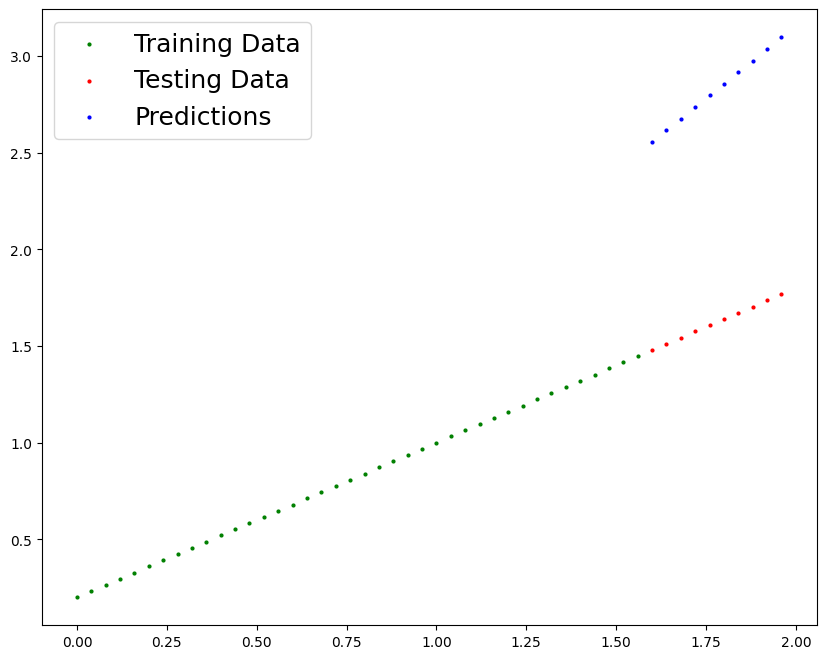

In [10]:
# visualizing (as the variables and internal parameters are randomly initialized, the predictions are quite closer to random)
plot_predictions(predictions=y_pred)

## Training the model to move from random params to known params
* Improving model to represent data in a better way
* To measure how poor the model predictions, a **loss function (cost function, criterion)** can be used.
* Function that measures **how wrong the model predictions are to the ideal outputs** is a loss function. The lower the loss function, the better the model.
* **Optimizer** for adjusting models parameters by minimizing the loss values.
* lr stands for **learning rate**, the higher the learning rate the more it adjusts the model parameters.


In [11]:
# Checking loss function of y_preds
import torch.nn as nn
loss_fn = nn.L1Loss()

In [12]:
# Setting up an optimizer (SGD which randomly adjusts the random values until minimizing the loss values), with a learning rate
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

## Building a training loop
* 1. Loop through the data
* 2. **Forward Pass/Propagation** ie involves data moving thorugh the model function.
* 3. Calculating the loss by comparing forward pass predictions to ground labels.
* 4. Optimizer zero grad
* 5. Loss backward (data/calculation happens backwards) ie **back propagation**
* 6. Optimizer step - use the optimizer ie **gradient descent** to adjust the model params to try and improve the loss

In [13]:
torch.manual_seed(42)

# Setting up an parameter epoch, which is one loop through data (this is a hyperparameter)
epochs = 200

# Loop through data
for epoch in range(epochs):
  # Setting the model to training mode (the default state of model)
  model_1.train()

  # Forward Propagataion
  y_train_preds = model_1(X_train)

  # Calculating the loss
  train_loss = loss_fn(y_train_preds, y_train)
  # print(f"Loss: {loss}")

  # Optimizer zero grad
  optimizer.zero_grad()

  # Back Propagation on the loss
  train_loss.backward()

  # Performing gard descent
  optimizer.step()

  #### Evaluation / Testing Step
  model_1.eval()
  with torch.inference_mode():

    # Forward Pass
    y_test_preds = model_1(X_test)

    # Loss Function
    test_loss = loss_fn(y_test_preds, y_test)

  # Printing out what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")

    # Printing out the state_dict
    print(model_1.state_dict())

Epoch: 0 | Train Loss: 0.5003025531768799 | Test Loss: 1.1794511079788208
OrderedDict({'weights': tensor([1.4982]), 'bias': tensor([0.1366])})
Epoch: 10 | Train Loss: 0.37751466035842896 | Test Loss: 0.964851975440979
OrderedDict({'weights': tensor([1.4218]), 'bias': tensor([0.0581])})
Epoch: 20 | Train Loss: 0.2852507531642914 | Test Loss: 0.7746235132217407
OrderedDict({'weights': tensor([1.3492]), 'bias': tensor([-0.0029])})
Epoch: 30 | Train Loss: 0.22053980827331543 | Test Loss: 0.614108145236969
OrderedDict({'weights': tensor([1.2832]), 'bias': tensor([-0.0459])})
Epoch: 40 | Train Loss: 0.17880132794380188 | Test Loss: 0.4857941269874573
OrderedDict({'weights': tensor([1.2257]), 'bias': tensor([-0.0719])})
Epoch: 50 | Train Loss: 0.15322422981262207 | Test Loss: 0.38935428857803345
OrderedDict({'weights': tensor([1.1777]), 'bias': tensor([-0.0829])})
Epoch: 60 | Train Loss: 0.13728761672973633 | Test Loss: 0.3206499218940735
OrderedDict({'weights': tensor([1.1385]), 'bias': tens

In [14]:
with torch.inference_mode():
  y_preds_new = model_1(X_test)

### Predictions on X_test data
* As the epoch was given 200, it allows a model to learn better by repeatedly seeing the data, but too many epochs can lead to overfitting.
* Prediticted the model on X_test data and plotted using matplotlib.
* The predicted model is improved and loss values is less.
### Testing Code
* Turns off different settings in the model, which are not needed for evaluation
* inference_mode turns off the gradient tracking
### Plotting the predictions
* First one is before improving the model
* Second plot is after improving and prediction

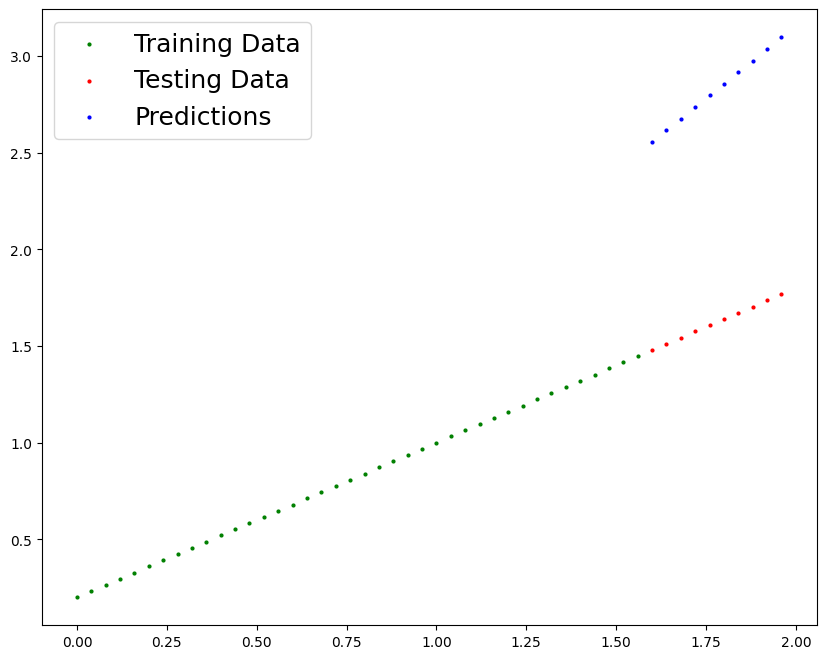

In [15]:
plot_predictions(predictions=y_pred)

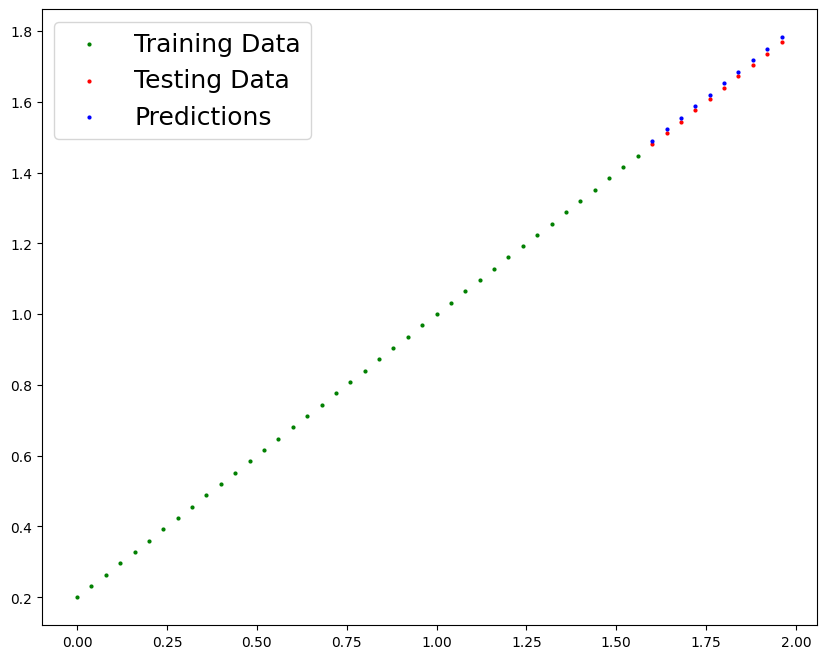

In [16]:
plot_predictions(predictions=y_preds_new)

### Saving the model in PyTorch
* A model in PyTorch can be saved and loaded in three different methods.
  * **torch.save()**: Allows to save PyTorch object in pickle format
  * **torch.load()**: Allows to load a saved Pytorch object.
  * **torch.nn.Module.load_state_dict()**: Allows to load a model's saved state dictionary

In [17]:
# A built-in python module which helps to
from pathlib import Path

## 1. Creating a model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

## 2. Creating a model save path
MODEL_NAME = "01_PyTorch_Workflow_Model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

## 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/01_PyTorch_Workflow_Model_1.pth


In [18]:
!ls -l models

total 4
-rw-r--r-- 1 root root 2117 Jan 24 22:10 01_PyTorch_Workflow_Model_1.pth


### Loading the saved model
* In the previos state, only the **state_dict()** of the model has been saved(instead of entire model).
* Now, will create a new instance of the model class and load the saved 'state_dict()' into the instance model class.

In [19]:
loaded_model_1 = LinearRegressionModel()

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [20]:
loaded_model_1.state_dict()

OrderedDict([('weights', tensor([0.8138])), ('bias', tensor([0.1871]))])

### Making predictions as earlier with the loaded model, and checking the results with earlier preds using comparision operator

In [21]:
# Making some predictions with the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_1(X_test)
loaded_model_preds

tensor([[1.4892],
        [1.5217],
        [1.5543],
        [1.5868],
        [1.6194],
        [1.6519],
        [1.6845],
        [1.7170],
        [1.7496],
        [1.7821]])

In [22]:
y_test_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting all together

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print("PyTorch Version:" ,torch.__version__)

PyTorch Version: 2.9.0+cu126


### Creating a Device Agnostic Code
* Device agnostic code means, for computing the code will use GPU if there is access to it if not the code will use CPU

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


## Building a model to estimate the values of known parameters
### 1. Creating **Data** by using the **Linear Regression** Formula y = wX + b

In [25]:
# Lets start with parameters
w = 1.4
b = 0.6

# Range Values
start = 0
end = 1
step = 0.02

# Creating features X and labels y
X = torch.arange(start, end , step).unsqueeze(dim=1)
y = w * X + b
X[:20], y[:20]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]),
 tensor([[0.6000],
         [0.6280],
         [0.6560],
         [0.6840],
         [0.7120],
         [0.7400],
         [0.7680],
         [0.7960],
         [0.8240],
         [0.8520],
         [0.8800],
         [0.9080],
         [0.9360],
         [0.9640],
         [0.9920],
         [1.0200],
         [1.0480],
         [1.0760],
         [1.1040],
         [1.1320]]))

In [26]:
## Splitting data into train and test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

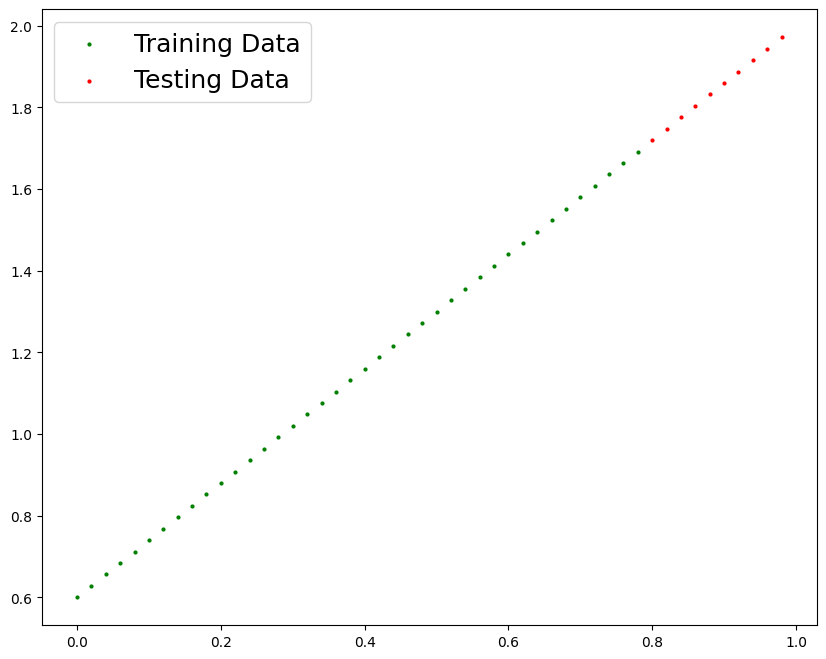

In [27]:
# Plotting the data using the previous plot_pred() function
plot_predictions(X_train, y_train, X_test, y_test)


### 2. Building a model

In [159]:
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()

    # Using nn.Linear() layer which have the in-built params ie applies linear math operation on data
    self.Linear_layer = nn.Linear(in_features=1,
                                    out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.Linear_layer(x)

# Setting the seed
torch.manual_seed(42)
model_2 = LinearRegressionModel2()
model_2

LinearRegressionModel2(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [160]:
model_2.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
             ('Linear_layer.bias', tensor([0.8300]))])

### Checking the device this model on

In [161]:
next(model_2.parameters()).device

device(type='cpu')

### Moving the model from CPU to target device ie GPU

In [162]:
model_2.to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

### 3. Training the model
* In the training phase there are four key steps:
  * a Loss function
  * an Optimizer
  * Training Loop
  * Testing/Evaluation Loop

In [163]:

# Setting up loss function
loss_func = nn.L1Loss()

# Setting up optimizer
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

In [164]:
## Training Loop
torch.manual_seed(42)

epochs = 400

# Putting Data on target device GPU using device agnostic code, as the model is already on GPU
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_2.train()

  # Forward Pass
  y_pred = model_2(X_train)

  # Calculating the Loss
  loss_train = loss_func(y_pred, y_train)

  # Zero optimizer grad
  optimizer.zero_grad()

  # Back propagation
  loss_train.backward()

  # Optimization using SGD
  optimizer.step()

  ## Testing Loop / Evaluation Step
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test)

    loss_test = loss_func(test_pred, y_test)

  # Printing out whats happening inside
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Training Loss: {loss_train} | Testing Loss: {loss_test}")

Epoch: 0 | Training Loss: 0.1276656687259674 | Testing Loss: 0.3331037163734436
Epoch: 10 | Training Loss: 0.12275031954050064 | Testing Loss: 0.3099507987499237
Epoch: 20 | Training Loss: 0.11875035613775253 | Testing Loss: 0.2921510338783264
Epoch: 30 | Training Loss: 0.11506674438714981 | Testing Loss: 0.2790972590446472
Epoch: 40 | Training Loss: 0.11157672852277756 | Testing Loss: 0.26807746291160583
Epoch: 50 | Training Loss: 0.1080867275595665 | Testing Loss: 0.25705772638320923
Epoch: 60 | Training Loss: 0.10459669679403305 | Testing Loss: 0.24603794515132904
Epoch: 70 | Training Loss: 0.10111948102712631 | Testing Loss: 0.23570500314235687
Epoch: 80 | Training Loss: 0.09768068045377731 | Testing Loss: 0.22743263840675354
Epoch: 90 | Training Loss: 0.0942465290427208 | Testing Loss: 0.2198471575975418
Epoch: 100 | Training Loss: 0.09081584960222244 | Testing Loss: 0.21157479286193848
Epoch: 110 | Training Loss: 0.08737703412771225 | Testing Loss: 0.20330238342285156
Epoch: 120 

In [165]:
model_2.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[1.3948]], device='cuda:0')),
             ('Linear_layer.bias', tensor([0.5995], device='cuda:0'))])

In [166]:
w, b

(1.4, 0.6)

### 4. Making and Evaluating predictions

In [167]:
# Evaluating
model_2.eval()
with torch.inference_mode():
  test_preds = model_2(X_test)
test_preds

tensor([[1.7153],
        [1.7432],
        [1.7711],
        [1.7990],
        [1.8269],
        [1.8548],
        [1.8827],
        [1.9106],
        [1.9385],
        [1.9664]], device='cuda:0')

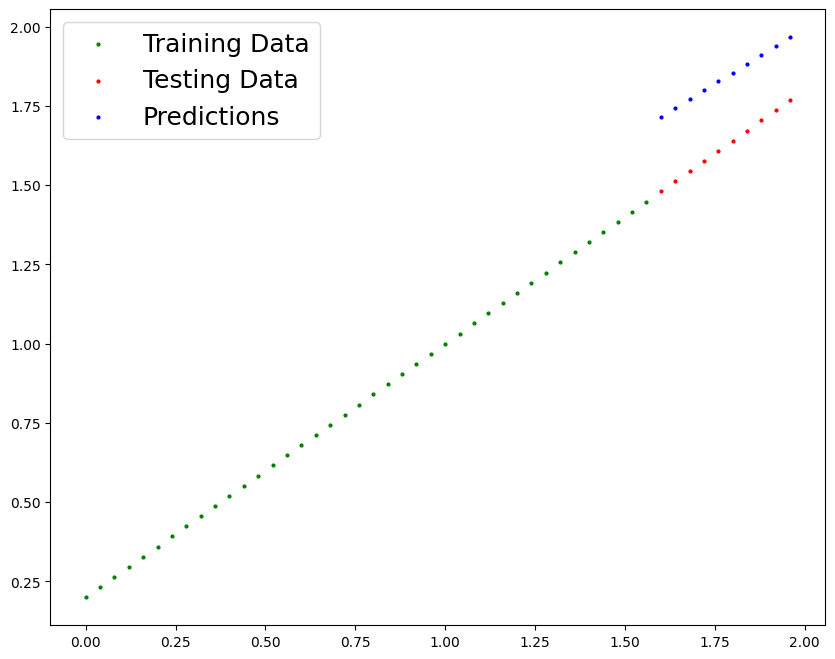

In [168]:
plot_predictions(predictions=test_preds.cpu())

## 5. Saving and Loading the model


In [169]:
from pathlib import Path

# Creating Model's Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# Creating Model's Save Path
MODEL_NAME = "02_PyTorch_Workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Saving the model state dict
print(f"Savind Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f = MODEL_SAVE_PATH)

Savind Model to: models/02_PyTorch_Workflow_model_2.pth


In [170]:
!ls -l models

total 8
-rw-r--r-- 1 root root 2245 Jan 24 23:03 01_PyTorch_Workflow_Model_1.pth
-rw-r--r-- 1 root root 2245 Jan 24 23:14 02_PyTorch_Workflow_model_2.pth


In [171]:
## Loading the saved model by creating a new instance
loaded_model_2 = LinearRegressionModel2()

## Loading the saved model state dict
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [172]:
## Putting the model to target device
loaded_model_2.to(device)

LinearRegressionModel2(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [173]:
next(loaded_model_2.parameters()).device

device(type='cuda', index=0)

In [174]:
loaded_model_2.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[1.3948]], device='cuda:0')),
             ('Linear_layer.bias', tensor([0.5995], device='cuda:0'))])

## Evaluating the loaded model

In [179]:
loaded_model_2.eval()
with torch.inference_mode():
  loaded_model_2_preds = loaded_model_2(X_test)
test_preds == loaded_model_2_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')